In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
read_windows = 0
if read_windows == False:
    covid19data = pd.read_csv("covid19-global-forecasting-week-2/data/train.csv")

    WHS = pd.read_csv("covid19-global-forecasting-week-2/data/2.12_Health_systems.csv")
else:
    covid19data = pd.read_csv("train.csv")
    WHS = pd.read_csv("2.12_Health_systems.csv")



In [3]:
#print(covid19data.Country_Region.unique())

#print(covid19data[covid19data.Country_Region == "China"])

In [4]:
data = covid19data.query("Date>'2020-01-22'and Date<='2020-03-27'")
target_value = covid19data.query("Date >= '2020-03-28'")


timestamps = []
countries = []
provinces = []
confirmed_cases = []
fatalities = []

vector_df = pd.DataFrame(columns=["Country_Region", "Province_State", "Confirmed_Cases_X", "Fatalities_X"])

for country in data.Country_Region.unique():
    for province in data.query(f'Country_Region=="{country}"').Province_State.unique():
        countries.append(country)
        provinces.append(province)
        if str(province) == "nan":
            temp_df = data.query(f'Country_Region=="{country}"')
        else:
            temp_df = data.query(f'Country_Region=="{country}" and Province_State =="{province}"')
        confirmed_cases.append([float(x) for x in temp_df["ConfirmedCases"]])
        fatalities.append([float(x) for x in temp_df["Fatalities"]])
        #print(country, province, len(temp_df))
        
vector_df.Country_Region = countries
vector_df.Province_State = provinces
vector_df.Confirmed_Cases_X = confirmed_cases 
vector_df.Fatalities_X = fatalities; vector_df.head(5)


#clearing duplicated regions
for i, value in vector_df.iterrows():
    if len(value.Confirmed_Cases_X) > 65:
        vector_df = vector_df.drop(i)

# for i, value in vector_df.iterrows():
#     print(value.Country_Region, len(value.Fatalities_X))
    


In [5]:
temp_df = vector_df.copy().drop("Fatalities_X", axis=1) ; temp_df.head(5)

,Country_Region,Province_State,Confirmed_Cases_X
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [6]:
list_of_cases_dicts = []


for i, region in temp_df.iterrows():
    #print(region.Country_Region)
    #print(region.Province_State)
    cases_dict = {}
    nday = 1
    cases_dict["World_Bank_Name"] = region.Country_Region
    cases_dict["Province_State"] = region.Province_State
    for value in region.Confirmed_Cases_X:
        cases_dict[f"day_{nday}"] = value
        nday +=1
    list_of_cases_dicts.append(cases_dict)
    
#print(list_of_cases_dicts)

Cases_df = pd.DataFrame(list_of_cases_dicts) 
print(Cases_df.shape); Cases_df.head(5)


(290, 67)


,Province_State,World_Bank_Name,day_1,day_10,day_11,day_12,day_13,day_14,day_15,day_16,...,day_6,day_60,day_61,day_62,day_63,day_64,day_65,day_7,day_8,day_9
0,NaN,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,40.0,74.0,84.0,94.0,110.0,0.0,0.0,0.0
1,NaN,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,89.0,104.0,123.0,146.0,174.0,186.0,0.0,0.0,0.0
2,NaN,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,201.0,230.0,264.0,302.0,367.0,409.0,0.0,0.0,0.0
3,NaN,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,113.0,133.0,164.0,188.0,224.0,267.0,0.0,0.0,0.0
4,NaN,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,3.0,3.0,3.0,4.0,4.0,0.0,0.0,0.0


In [7]:
temp_df = vector_df.copy().drop("Confirmed_Cases_X", axis=1) ; temp_df.head(5)

,Country_Region,Province_State,Fatalities_X
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
list_of_fatalities_dicts = []


for i, region in temp_df.iterrows():
    #print(region.Country_Region)
    #print(region.Province_State)
    fatalities_dict = {}
    nday = 1
    fatalities_dict["World_Bank_Name"] = region.Country_Region
    fatalities_dict["Province_State"] = region.Province_State
    for value in region.Fatalities_X:
        fatalities_dict[f"day_{nday}"] = value
        nday +=1
    list_of_fatalities_dicts.append(fatalities_dict)
    
#print(list_of_fatalities_dicts)

Fatalities_df = pd.DataFrame(list_of_fatalities_dicts)
print(Fatalities_df.shape); Fatalities_df.head(5)

(290, 67)


,Province_State,World_Bank_Name,day_1,day_10,day_11,day_12,day_13,day_14,day_15,day_16,...,day_6,day_60,day_61,day_62,day_63,day_64,day_65,day_7,day_8,day_9
0,NaN,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,2.0,4.0,4.0,0.0,0.0,0.0
1,NaN,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,4.0,5.0,5.0,6.0,8.0,0.0,0.0,0.0
2,NaN,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17.0,17.0,19.0,21.0,25.0,26.0,0.0,0.0,0.0
3,NaN,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0
4,NaN,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df = vector_df.merge(WHS, on=['Country_Region', 'Province_State'], how = "left") ; df.head(5)
df[['Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_100000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16']] = df[['Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016', 'Physicians_per_1000_2009-18',
       'Nurse_midwife_per_1000_2009-18',
       'Specialist_surgical_per_100000_2008-18',
       'Completeness_of_birth_reg_2009-18',
       'Completeness_of_death_reg_2008-16']].fillna(0, axis=1)

df.head(5)

,Country_Region,Province_State,Confirmed_Cases_X,Fatalities_X,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0.0
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Andorra,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.0,25.0,0.0


In [10]:
print(f'Data set contains info of:\t{len(df["Country_Region"].unique())} countries')

Data set contains info of:	173 countries


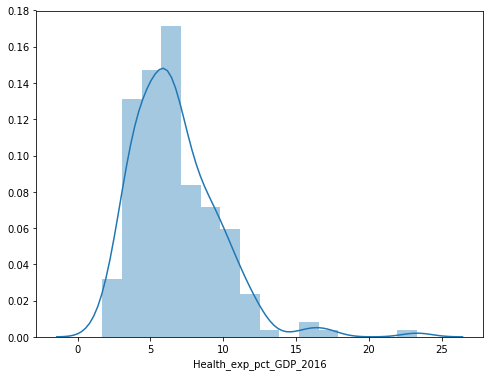

In [11]:
plt.figure(figsize=[8,6])
sns.distplot(WHS["Health_exp_pct_GDP_2016"])

In [12]:
#print(df[df["Country_Region"] =="US"].Province_State)
#print(df[df["Country_Region"] =="Italy"].Confirmed_Cases_X)


In [13]:
print(df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases_X)

62    [444.0, 549.0, 761.0, 1058.0, 1423.0, 3554.0, ...
Name: Confirmed_Cases_X, dtype: object


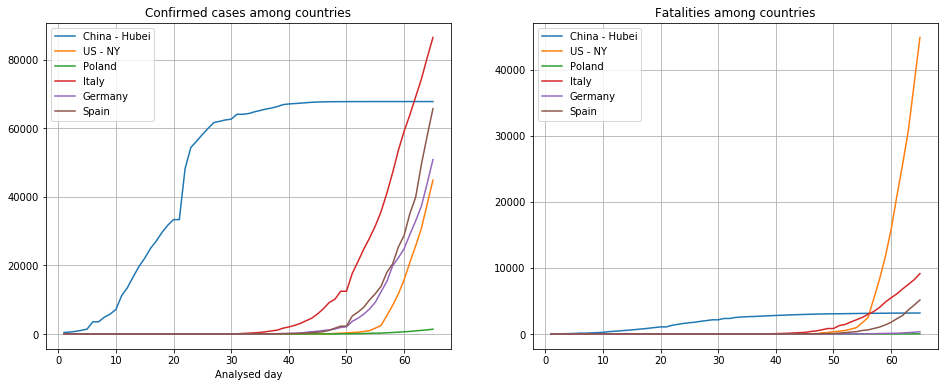

In [14]:
f, ax = plt.subplots(1, 2, figsize=[16, 6])
number_of_days = 66
countries_to_plot = ["Poland", "Italy", "Germany", "Spain"]

ax[0].plot(range(1, number_of_days), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases_X.values[0], label = "China - Hubei")
ax[0].plot(range(1, number_of_days), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases_X.values[0], label = "US - NY")
for country in countries_to_plot:
     ax[0].plot(range(1, number_of_days), df[df["Country_Region"] == country]["Confirmed_Cases_X"].values[0], label = country)
ax[0].set_title("Confirmed cases among countries")
ax[0].set_xlabel("Analysed day")
ax[0].legend()
ax[0].grid()

ax[1].plot(range(1, number_of_days), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Fatalities_X.values[0], label = "China - Hubei")
ax[1].plot(range(1, number_of_days), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases_X.values[0], label = "US - NY")
for country in countries_to_plot:
     ax[1].plot(range(1, number_of_days), df[df["Country_Region"] == country].Fatalities_X.values[0], label = country)
ax[1].set_title("Fatalities among countries")
ax[0].set_xlabel("Analysed day")
ax[1].legend()
ax[1].grid()

In [15]:
WHS.head(5)

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [16]:
for column in WHS:
    if column not in ["Country_Region", "Province_State", "World_Bank_Name"]:
        WHS[column] = WHS[column].fillna(np.nanmean(WHS[column]))
#print(sum(WHS.World_Bank_Name == "China"))

In [17]:
print(set(df.Country_Region.unique()) ^ set(target_value.Country_Region.unique()))
print(set(df.Province_State.unique()) ^ set(target_value.Province_State.unique()))

set()
set()


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, Dropout, LSTM, Concatenate, LeakyReLU, Flatten
from keras.activations import relu
from keras.losses import mean_squared_error, hinge, mean_absolute_percentage_error
from keras.callbacks.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [19]:
# X_features = df.drop(columns=["Country_Region","Confirmed_Cases_X", "Fatalities_X", "Province_State", "World_Bank_Name", "Id", "Date", "ConfirmedCases", "Fatalities", "CF_Vector"], axis=1)
# X_vector = np.asarray(df["CF_Vector"])
# y_cases = df[["ConfirmedCases"]]
# y_fatalities = df[["Fatalities"]]

In [20]:
#WHS_mapped = Fatalities_df.merge(WHS, on=["World_Bank_Name"], how="left");
WHS_mapped_c = Cases_df.merge(WHS, on=["World_Bank_Name"], how="left");
WHS_mapped_c.columns
#print(WHS_mapped_f.shape, WHS_mapped_c.shape); WHS_mapped_f.head(5)

Index(['Province_State_x', 'World_Bank_Name', 'day_1', 'day_10', 'day_11',
       'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18',
       'day_19', 'day_2', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_3', 'day_30',
       'day_31', 'day_32', 'day_33', 'day_34', 'day_35', 'day_36', 'day_37',
       'day_38', 'day_39', 'day_4', 'day_40', 'day_41', 'day_42', 'day_43',
       'day_44', 'day_45', 'day_46', 'day_47', 'day_48', 'day_49', 'day_5',
       'day_50', 'day_51', 'day_52', 'day_53', 'day_54', 'day_55', 'day_56',
       'day_57', 'day_58', 'day_59', 'day_6', 'day_60', 'day_61', 'day_62',
       'day_63', 'day_64', 'day_65', 'day_7', 'day_8', 'day_9',
       'Country_Region', 'Province_State_y', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016

In [21]:
WHS_mapped_c.columns

Index(['Province_State_x', 'World_Bank_Name', 'day_1', 'day_10', 'day_11',
       'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18',
       'day_19', 'day_2', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_3', 'day_30',
       'day_31', 'day_32', 'day_33', 'day_34', 'day_35', 'day_36', 'day_37',
       'day_38', 'day_39', 'day_4', 'day_40', 'day_41', 'day_42', 'day_43',
       'day_44', 'day_45', 'day_46', 'day_47', 'day_48', 'day_49', 'day_5',
       'day_50', 'day_51', 'day_52', 'day_53', 'day_54', 'day_55', 'day_56',
       'day_57', 'day_58', 'day_59', 'day_6', 'day_60', 'day_61', 'day_62',
       'day_63', 'day_64', 'day_65', 'day_7', 'day_8', 'day_9',
       'Country_Region', 'Province_State_y', 'Health_exp_pct_GDP_2016',
       'Health_exp_public_pct_2016', 'Health_exp_out_of_pocket_pct_2016',
       'Health_exp_per_capita_USD_2016', 'per_capita_exp_PPP_2016',
       'External_health_exp_pct_2016

In [22]:
for column in WHS_mapped_c:
    if "day" in column or column in ["Province_State_x", "World_Bank_Name", "Country_Region", "Province_State_y"]:
        WHS_mapped_c = WHS_mapped_c.drop(column, axis=1)
        
#hep_mean = np.nanmean(WHS_mapped_c["Health_exp_pct_GDP_2016"])
#WHS_mapped_c = WHS_mapped_c["Health_exp_pct_GDP_2016"].fillna(np.nanmean(hep_mean))   

In [23]:
for column in WHS_mapped_c:        
    mean = np.nanmean(WHS_mapped_c[column])
    #WHS_mean = np.nanmean(WHS_mapped_c[column])
    WHS_mapped_c[column] = WHS_mapped_c[column].fillna(mean)

In [24]:
# for column in WHS_mapped_c:
#     if column not in ["Country_Region", "Province_State", "World_Bank_Name"]:
#         WHS_mapped_c[column] = WHS_mapped_c[column].fillna(np.nanmean(WHS_mapped_c[column]))

In [25]:
print(WHS_mapped_c.shape); WHS_mapped_c.head(5)

(290, 11)


,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,10.2,5.1,77.4,57.2,162.8,17.500000,0.3,0.3,0.000000,42.3,89.309346
1,6.7,41.4,58.0,271.5,759.7,0.700000,1.2,3.6,11.600000,98.4,53.000000
2,6.6,67.7,30.9,260.4,998.2,0.000000,1.8,2.2,12.100000,100.0,89.309346
3,10.4,49.1,41.7,3834.7,4978.7,9.116766,3.3,4.0,83.100000,100.0,80.000000
4,2.9,44.1,35.2,95.2,185.8,3.600000,0.2,1.3,37.937143,25.0,89.309346


In [26]:
X_fatalities = Fatalities_df.drop(["Province_State", "World_Bank_Name", "day_65"], axis=1)
X_cases = Cases_df.drop(["Province_State", "World_Bank_Name", "day_65"], axis=1)

y_fatalities = Fatalities_df[["day_65"]]
y_cases = Fatalities_df[["day_65"]]; print(X_fatalities.shape, X_cases.shape, y_fatalities.shape, y_cases.shape)

(290, 64) (290, 64) (290, 1) (290, 1)


In [27]:
scaler = MinMaxScaler()
X_fatalities = scaler.fit_transform(X_fatalities)
X_cases = scaler.fit_transform(X_cases); print(X_fatalities.shape, X_cases.shape, y_fatalities.shape, y_cases.shape)

(290, 64) (290, 64) (290, 1) (290, 1)


In [28]:
X_fatalities = X_fatalities.reshape(290, 1, 64)
X_cases = X_cases.reshape(290, 1, 64)

In [29]:
LSTM_1_input_layer = Input(shape=(1, 64)) ##(2,1)
LSTM_1 = LSTM(64, return_sequences=True, recurrent_dropout=0.2)(LSTM_1_input_layer)
LSTM_1_dropout = Dropout(0.2)(LSTM_1)

LSTM_2_input_layer = Input(shape=(1, 64)) ##(2,1)
LSTM_2 = LSTM(64, return_sequences=True, recurrent_dropout=0.2)(LSTM_2_input_layer)
LSTM_2_dropout = Dropout(0.2)(LSTM_2)

WHS_input_layer = Input(shape=(11,))
WHS = Dense(64)(WHS_input_layer)
WHS_dropout = Dropout(0.3)(WHS)


rnn_c = LSTM(32)(LSTM_1_dropout)
concat_c = Concatenate(axis=-1)([rnn_c, WHS_dropout])
dense_c = Dense(128)(concat_c)
dropout_c = Dropout(0.3)(dense_c)
cases = Dense(1, activation=LeakyReLU(alpha=0.1),name="cases")(dropout_c)


rnn_f = LSTM(32)(LSTM_2_dropout)
concat_f = Concatenate(axis=-1)([rnn_f, WHS_dropout])
dense_f = Dense(128)(concat_f)
dropout_f = Dropout(0.3)(dense_f)
fatalities = Dense(1, activation=LeakyReLU(alpha=0.1), name="fatalities")(dropout_f)


model = Model([LSTM_1_input_layer, LSTM_2_input_layer, WHS_input_layer], [cases, fatalities])

model.summary()

model.compile(loss=[mean_squared_error, mean_squared_error], optimizer='adam')



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 64)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1, 64)        0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 1, 64)        33024       input_1[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 11)           0                                            
____________________________________________________________________________________________

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [30]:
#callbacks = [EarlyStopping(monitor="loss", patience=50), ReduceLROnPlateau(monitor="loss", patience=5)]

In [33]:
history = model.fit([X_cases, X_fatalities, WHS_mapped_c],[y_cases, y_fatalities], epochs=300, batch_size=8)
 #                  callbacks=callbacks)

Epoch 1/300
290/290 [==============================] - 1s 3ms/step - loss: 114055.6990 - cases_loss: 39579.8320 - fatalities_loss: 72451.2344
Epoch 2/300
290/290 [==============================] - 1s 4ms/step - loss: 191195.3751 - cases_loss: 59661.3320 - fatalities_loss: 128442.2188
Epoch 3/300
290/290 [==============================] - 1s 3ms/step - loss: 145919.3791 - cases_loss: 83978.4531 - fatalities_loss: 94686.1328
Epoch 4/300
290/290 [==============================] - 1s 3ms/step - loss: 224157.0784 - cases_loss: 124334.2734 - fatalities_loss: 96374.4922
Epoch 5/300
290/290 [==============================] - 1s 4ms/step - loss: 242911.7980 - cases_loss: 143640.5938 - fatalities_loss: 95097.9844
Epoch 6/300
290/290 [==============================] - 1s 3ms/step - loss: 225239.8990 - cases_loss: 91881.3047 - fatalities_loss: 129209.7188
Epoch 7/300
290/290 [==============================] - 1s 3ms/step - loss: 217469.9938 - cases_loss: 88514.2734 - fatalities_loss: 125542.1484
E

290/290 [==============================] - 1s 3ms/step - loss: 216038.2460 - cases_loss: 125149.8359 - fatalities_loss: 87442.3594
Epoch 59/300
290/290 [==============================] - 1s 3ms/step - loss: 116691.0749 - cases_loss: 58272.0000 - fatalities_loss: 56406.3789
Epoch 60/300
290/290 [==============================] - 1s 3ms/step - loss: 129113.5085 - cases_loss: 54695.9688 - fatalities_loss: 72904.8828
Epoch 61/300
290/290 [==============================] - 1s 4ms/step - loss: 107878.1591 - cases_loss: 39731.0625 - fatalities_loss: 70222.5781
Epoch 62/300
290/290 [==============================] - 1s 4ms/step - loss: 165966.9834 - cases_loss: 80499.8516 - fatalities_loss: 82632.7578
Epoch 63/300
290/290 [==============================] - 1s 4ms/step - loss: 154393.0755 - cases_loss: 59207.0664 - fatalities_loss: 92471.7500
Epoch 64/300
290/290 [==============================] - 1s 4ms/step - loss: 72948.3113 - cases_loss: 31518.9062 - fatalities_loss: 41094.1680
Epoch 65/300

290/290 [==============================] - 1s 3ms/step - loss: 99071.4326 - cases_loss: 31246.0918 - fatalities_loss: 66227.9375
Epoch 116/300
290/290 [==============================] - 1s 3ms/step - loss: 66916.3984 - cases_loss: 34242.1602 - fatalities_loss: 32068.9062
Epoch 117/300
290/290 [==============================] - 1s 3ms/step - loss: 122780.2135 - cases_loss: 55477.3047 - fatalities_loss: 65823.0938
Epoch 118/300
290/290 [==============================] - 1s 4ms/step - loss: 105749.0809 - cases_loss: 39220.6211 - fatalities_loss: 65193.0195
Epoch 119/300
290/290 [==============================] - 1s 3ms/step - loss: 78401.6378 - cases_loss: 37395.1641 - fatalities_loss: 40410.1641
Epoch 120/300
290/290 [==============================] - 1s 3ms/step - loss: 118271.8688 - cases_loss: 42868.7617 - fatalities_loss: 73379.9141
Epoch 121/300
290/290 [==============================] - 1s 3ms/step - loss: 93549.7952 - cases_loss: 32808.3828 - fatalities_loss: 60496.9648
Epoch 122/

290/290 [==============================] - 1s 3ms/step - loss: 90575.0602 - cases_loss: 30537.8203 - fatalities_loss: 89646.8750
Epoch 173/300
290/290 [==============================] - 1s 3ms/step - loss: 120745.7617 - cases_loss: 44019.5117 - fatalities_loss: 76002.4766
Epoch 174/300
290/290 [==============================] - 1s 3ms/step - loss: 96151.3079 - cases_loss: 40155.1641 - fatalities_loss: 54369.4805
Epoch 175/300
290/290 [==============================] - 1s 3ms/step - loss: 101048.1357 - cases_loss: 39533.3125 - fatalities_loss: 60277.8242
Epoch 176/300
290/290 [==============================] - 1s 3ms/step - loss: 101224.7772 - cases_loss: 35852.2188 - fatalities_loss: 64494.2109
Epoch 177/300
290/290 [==============================] - 1s 3ms/step - loss: 78392.2449 - cases_loss: 35154.4961 - fatalities_loss: 42869.2539
Epoch 178/300
290/290 [==============================] - 1s 3ms/step - loss: 114839.9240 - cases_loss: 66680.5625 - fatalities_loss: 48055.8242
Epoch 179

290/290 [==============================] - 1s 3ms/step - loss: 83513.2433 - cases_loss: 38510.6953 - fatalities_loss: 43479.5508
Epoch 230/300
290/290 [==============================] - 1s 3ms/step - loss: 55677.7933 - cases_loss: 24364.6660 - fatalities_loss: 31161.6387
Epoch 231/300
290/290 [==============================] - 1s 3ms/step - loss: 57139.4160 - cases_loss: 29691.0137 - fatalities_loss: 26455.8633
Epoch 232/300
290/290 [==============================] - 1s 3ms/step - loss: 74392.8595 - cases_loss: 29840.8066 - fatalities_loss: 43508.3789
Epoch 233/300
290/290 [==============================] - 1s 3ms/step - loss: 243297.1498 - cases_loss: 118651.5547 - fatalities_loss: 120558.7812
Epoch 234/300
290/290 [==============================] - 1s 3ms/step - loss: 94743.3613 - cases_loss: 34627.2578 - fatalities_loss: 58378.4883
Epoch 235/300
290/290 [==============================] - 1s 3ms/step - loss: 141971.7694 - cases_loss: 68073.4453 - fatalities_loss: 71879.2031
Epoch 236

290/290 [==============================] - 1s 3ms/step - loss: 79573.9941 - cases_loss: 25617.3555 - fatalities_loss: 52888.2109
Epoch 287/300
290/290 [==============================] - 1s 3ms/step - loss: 91049.3778 - cases_loss: 34429.4961 - fatalities_loss: 55255.9062
Epoch 288/300
290/290 [==============================] - 1s 3ms/step - loss: 97312.6232 - cases_loss: 54812.0625 - fatalities_loss: 40870.9336
Epoch 289/300
290/290 [==============================] - 1s 3ms/step - loss: 138241.5141 - cases_loss: 57760.6758 - fatalities_loss: 78218.3672
Epoch 290/300
290/290 [==============================] - 1s 3ms/step - loss: 87291.2415 - cases_loss: 42426.6094 - fatalities_loss: 44437.4180
Epoch 291/300
290/290 [==============================] - 1s 3ms/step - loss: 69874.1507 - cases_loss: 44114.3672 - fatalities_loss: 33389.8984
Epoch 292/300
290/290 [==============================] - 1s 3ms/step - loss: 75515.0911 - cases_loss: 33121.8867 - fatalities_loss: 41307.6172
Epoch 293/30

No handles with labels found to put in legend.


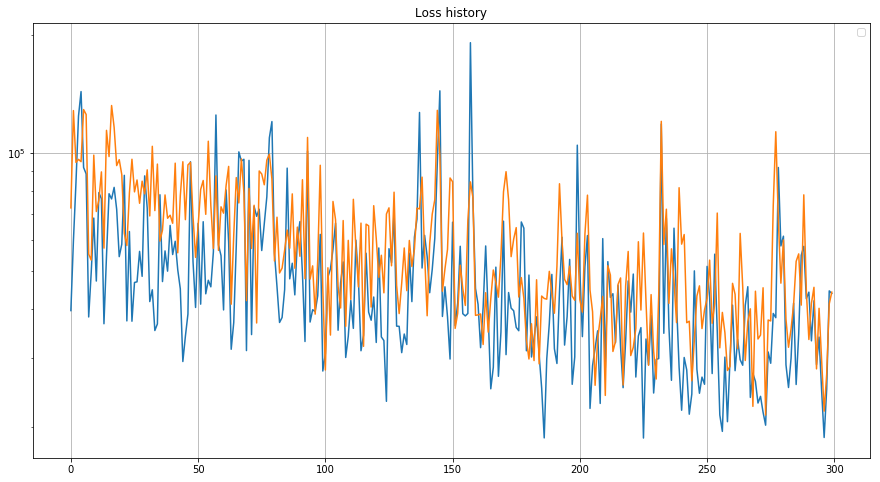

In [34]:
plt.figure(figsize=[15,8])
plt.title("Loss history")
plt.plot(history.history["cases_loss"])
plt.plot(history.history["fatalities_loss"])
plt.yscale("log")
plt.legend()
plt.grid()